In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. Load Data

In [2]:
counts = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/online_videos/video_count.csv')
features = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/online_videos/video_features.csv')

In [3]:
counts.head(3)

,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03


In [4]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41775 entries, 0 to 41774
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  41775 non-null  int64 
 1   count     41775 non-null  int64 
 2   date      41775 non-null  object
dtypes: int64(2), object(1)
memory usage: 979.2+ KB


In [5]:
counts['date'] = pd.to_datetime(counts['date'])

In [6]:
for column in counts.columns:
    uniques = counts[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

video_id              2785	 [2303 1193 1219 1472 2947]
count                33956	 [     22   54854 1788779     234   14407]
date                    15	 ['2015-01-07T00:00:00.000000000' '2015-01-12T00:00:00.000000000'
 '2015-01-03T00:00:00.000000000' '2015-01-04T00:00:00.000000000'
 '2015-01-08T00:00:00.000000000']


In [7]:
features.head(3)

,video_id,video_length,video_language,video_upload_date,video_quality
0,2374,1760,Cn,2014-12-06,480p
1,1897,489,Cn,2014-12-10,720p
2,2386,1273,Es,2014-12-05,480p


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           2785 non-null   int64 
 1   video_length       2785 non-null   int64 
 2   video_language     2785 non-null   object
 3   video_upload_date  2785 non-null   object
 4   video_quality      2785 non-null   object
dtypes: int64(2), object(3)
memory usage: 108.9+ KB


In [9]:
features['video_upload_date'] = pd.to_datetime(features['video_upload_date'])

In [10]:
for column in features.columns:
    uniques = features[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

video_id              2785	 [2374 1897 2386 2912 2432]
video_length          1037	 [1760  489 1273  986 1050]
video_language           6	 ['Cn' 'Es' 'Other' 'En' 'Fr']
video_upload_date       23	 ['2014-12-06T00:00:00.000000000' '2014-12-10T00:00:00.000000000'
 '2014-12-05T00:00:00.000000000' '2014-12-12T00:00:00.000000000'
 '2014-12-16T00:00:00.000000000']
video_quality            5	 ['480p' '720p' '240p' '360p' '1080p']


### 2. Question 1

Classify each video into one the 3 categories below and explain your approach.

-- "Hot" - means trending up. These videos are candidate to be shown.

-- "Stable and Popular" - video view counts are flat, but very high. These videos are candidates to be shown too.

-- "Everything else" - these videos won't be shown.

In [11]:
data = counts.sort_values(by = ['video_id', 'date'])
data['before_date'] = data['date'].shift(1)
data['before_count'] = data['count'].shift(1)
data['before_video_id'] = data['video_id'].shift(1)
data = data[data.video_id == data.before_video_id].iloc[:, :-1]
data['change_%'] = 100*(data['count'] - data['before_count'])/data['before_count']
data.head(3)

,video_id,count,date,before_date,before_count,change_%
20407,1,129082,2015-01-02,2015-01-01,140460.0,-8.100527
29542,1,120868,2015-01-03,2015-01-02,129082.0,-6.363397
30401,1,97849,2015-01-04,2015-01-03,120868.0,-19.044743


In [12]:
data['changed'] = 0
data.loc[data['change_%'] < 0, 'changed'] = -1
data.loc[data['change_%'] > 0, 'changed'] = 1
data.head(3)

,video_id,count,date,before_date,before_count,change_%,changed
20407,1,129082,2015-01-02,2015-01-01,140460.0,-8.100527,-1
29542,1,120868,2015-01-03,2015-01-02,129082.0,-6.363397,-1
30401,1,97849,2015-01-04,2015-01-03,120868.0,-19.044743,-1


<AxesSubplot:xlabel='increase_day', ylabel='Count'>

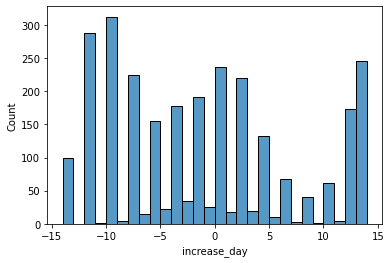

In [13]:
temp_change_count = data.groupby(['video_id'])['changed'].sum().reset_index(name = 'increase_day')
sns.histplot(data = temp_change_count , x = 'increase_day', bins = 28)

<AxesSubplot:xlabel='mean', ylabel='Count'>

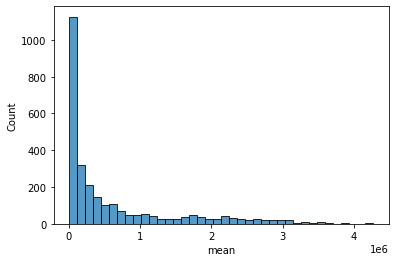

In [14]:
temp_mean = data.groupby(['video_id'])['count'].mean().reset_index(name = 'mean')
sns.histplot(data = temp_mean, x = 'mean')

In [15]:
temp_change_count.increase_day.describe()

count    2785.000000
mean       -1.490844
std         8.479946
min       -14.000000
25%       -10.000000
50%        -2.000000
75%         4.000000
max        14.000000
Name: increase_day, dtype: float64

In [16]:
data['count'].describe()

count    3.899000e+04
mean     6.154080e+05
std      8.868523e+05
min      1.000000e+00
25%      1.005700e+04
50%      1.729760e+05
75%      8.693192e+05
max      6.070570e+06
Name: count, dtype: float64

Based on the analysis above, we can classify videos into the three required categories in the following way:
    
1) if increase_day >= 5 : Hot
    
2) if -5 <= increase_day < 5 and mean_count >= 172976 : Stable and Popular

3) else: Everything else

In [17]:
data = counts.merge(temp_change_count).merge(temp_mean)
data['category'] = 'else'
data.loc[data['increase_day'] >= 5, 'category'] = 'Hot'
data.loc[(data['increase_day'] >= -5) & (data['increase_day'] < 5) & (data['mean'] >= 172976), 'category'] = 'stable'
data[['video_id', 'category']].drop_duplicates().groupby(['category'])['video_id'].count()

category
Hot        607
else      1503
stable     675
Name: video_id, dtype: int64

### 3. Question 2 & 3

What are the main characteristics of the "hot videos"?

After having identified the characteristics of the hot videos, how would you use this information from a product standpoint?

We can implement some data visualization techniques to compare the difference of features between the three categories.

In [18]:
data = data[['video_id', 'category']].merge(features)

In [19]:
data.head(3)

,video_id,category,video_length,video_language,video_upload_date,video_quality
0,2303,else,1071,Cn,2014-12-10,1080p
1,2303,else,1071,Cn,2014-12-10,1080p
2,2303,else,1071,Cn,2014-12-10,1080p


In [20]:
data['weekday'] = data['video_upload_date'].dt.weekday +1
data['Hot'] = data['category'] == 'Hot'

<AxesSubplot:xlabel='video_length', ylabel='Density'>

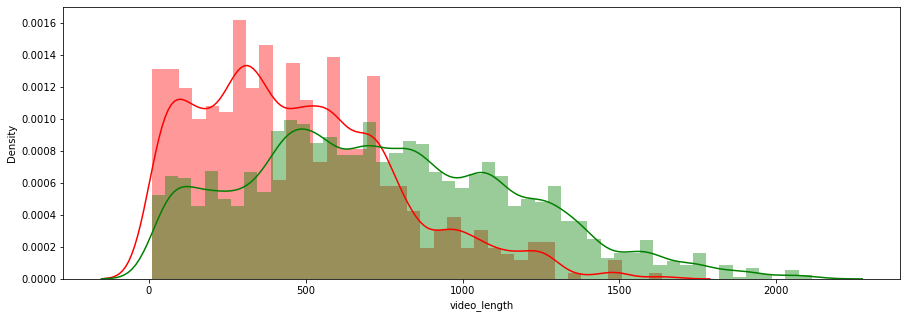

In [24]:
fig, ax = plt.subplots(figsize = (15, 5))

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
sns.distplot(data[data['Hot']==True]['video_length'], label='Hot', color = 'r')
sns.distplot(data[data['Hot']==False]['video_length'], label='Not Hot', color = 'g')

<AxesSubplot:xlabel='video_language', ylabel='video_id_x'>

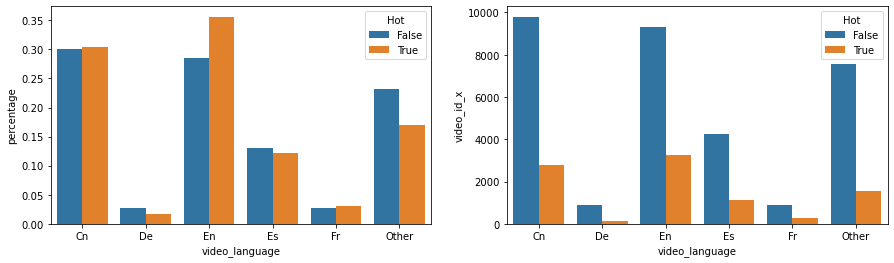

In [49]:
temp_1 = data.groupby(['Hot', 'video_language'])['video_id'].count().reset_index()
temp_2 = data.groupby(['Hot'])['video_id'].count().reset_index()
temp = temp_1.merge(temp_2, on = 'Hot')
temp['percentage'] = temp['video_id_x']/temp['video_id_y']

fig, ax = plt.subplots(1, 2, figsize = (15, 4))

sns.barplot(data = temp, x = 'video_language', y = 'percentage', hue = 'Hot', ax = ax[0])
sns.barplot(data = temp, x = 'video_language', y = 'video_id_x', hue = 'Hot', ax = ax[1])

<AxesSubplot:xlabel='video_quality', ylabel='video_id_x'>

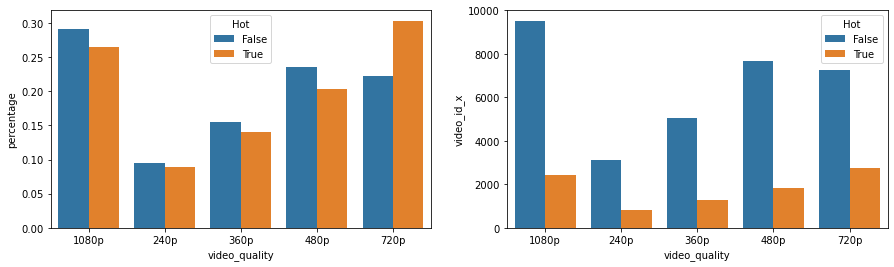

In [50]:
temp_1 = data.groupby(['Hot', 'video_quality'])['video_id'].count().reset_index()
temp_2 = data.groupby(['Hot'])['video_id'].count().reset_index()
temp = temp_1.merge(temp_2, on = 'Hot')
temp['percentage'] = temp['video_id_x']/temp['video_id_y']

fig, ax = plt.subplots(1, 2, figsize = (15, 4))

sns.barplot(data = temp, x = 'video_quality', y = 'percentage', hue = 'Hot', ax = ax[0])
sns.barplot(data = temp, x = 'video_quality', y = 'video_id_x', hue = 'Hot', ax = ax[1])

<AxesSubplot:xlabel='weekday', ylabel='video_id_x'>

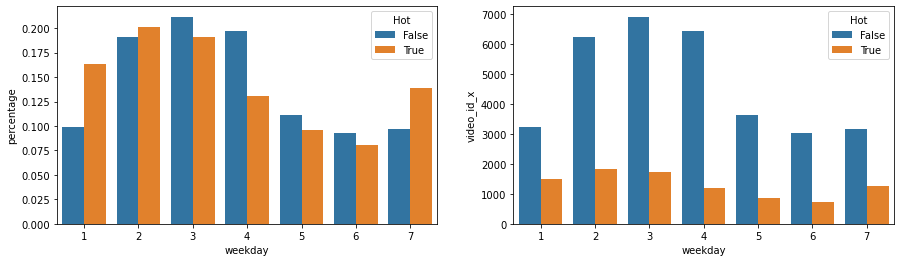

In [51]:
temp_1 = data.groupby(['Hot', 'weekday'])['video_id'].count().reset_index()
temp_2 = data.groupby(['Hot'])['video_id'].count().reset_index()
temp = temp_1.merge(temp_2, on = 'Hot')
temp['percentage'] = temp['video_id_x']/temp['video_id_y']

fig, ax = plt.subplots(1, 2, figsize = (15, 4))

sns.barplot(data = temp, x = 'weekday', y = 'percentage', hue = 'Hot', ax = ax[0])
sns.barplot(data = temp, x = 'weekday', y = 'video_id_x', hue = 'Hot', ax = ax[1])

Suggestion:

1) Most of the Hot videos have the video length less than 750 seconds. When users uploading new videos, if the original video is over 10 minutes, we can provide suggestions to users to shorten the video or split the video into multiple pieces.

2) Most of videos uploaded are in Chinese and English. English videos are more likely to be Hot. If users upload videos with other language, we can provide suggestions to users to provide English subtitles.

3) Most of videos uploaded are with quality of 1080p, 480p and 720p. 720p are more likely to be Hot. Therefore we can set the default video quality into 720p.

4) Most of videos uploaded are on Tuesday, Wednesday and Thursday. 720p are more likely to be Hot. Therefore we can set the default video quality into 720p.